In [6]:
import matplotlib.pyplot as plt
import numpy as np
from colorama import init
init()
from colorama import Fore, Back, Style
import pylab
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline

In [152]:
k=200*pow(10,-15)
h=10
vis=5/1000    
Pk=25
Rk=1500
rc=0.1
number=int(input('Введите количество скважин: '))
print('Введите дебиты (закачки) скважин):')
q_mass = [float(input())/86400 for _ in range(number)] 
#q_mass=[100,100,100,100,200]
#q_mass=np.array(q_mass)/86400
#q_mass
print('Введите значения координат Х: ')
x_map=[float(input()) for _ in range(number)]
#x_map=np.array(x_map)
#x_map
print('Введите значения координат Y: ')
y_map=[float(input()) for _ in range(number)]
#y_map=np.array(y_map)
#y_map
print('Введите виды скважин (PROD=2, INJ=1): ')
role=[float(input()) for _ in range(number)]
#role=np.array(role)
role


Введите количество скважин: 4
Введите дебиты (закачки) скважин):
100
100
100
200
Введите значения координат Х: 
0
1000
-200
300
Введите значения координат Y: 
504
60
111
232
Введите виды скважин (PROD=2, INJ=1): 
1
2
1
2


[1.0, 2.0, 1.0, 2.0]

In [153]:
def Pc(q,k,h,Pk,vis,Rk,rc):
    ln=(np.log(Rk)-np.log(rc))/np.log(2.73)
    return Pk-((q*vis*ln)/(2*3.14*k*h))/pow(10,6)

In [154]:
x = np.linspace(-1000, 1000, 100)
y = np.linspace(-1000, 1000, 100)
X, Y = np.meshgrid(x, y)

In [157]:
i=0
Psum=0
while i<number:
 P=pow(-1,role[i])*((Pk-Pc(q_mass[i],k,h,Pk,vis,Rk,rc))/((np.log(Rk)-np.log(rc))/np.log(2.73)))*((np.log(Rk)-np.log(np.sqrt(abs((X-x_map[i])**2+(Y-y_map[i])**2))))/np.log(2.73))
 Psum=Psum+P
 i=i+1
P=Pk-Psum

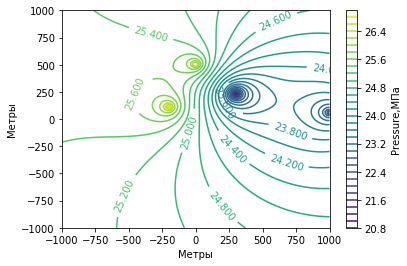

In [158]:
fig, axes = plt.subplots()

cs = plt.contour(X, Y, P,30) #contourf - temperature map
cb = plt.colorbar()
cb.set_label('Pressure,МПа')
axes.clabel(cs) # убрать для температурной карты
axes.set_xlabel('Метры')
axes.set_ylabel('Метры')
plt.show()